In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
in_vehicle_coupon_data = pd.read_csv("in-vehicle-coupon-recommendation.csv")
in_vehicle_coupon_data.head() #Display the first few rows

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation (2).csv


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
in_vehicle_coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
#This code snippet has been taken from Niralidedaniya (2022).
print('Is there any missing value present or not?',in_vehicle_coupon_data.isnull().values.any())
missing_percentage = in_vehicle_coupon_data.isnull().sum()*100/len(in_vehicle_coupon_data) #Calculate the percentage of missing data
missing_value_df = pd.DataFrame({'missing_count': in_vehicle_coupon_data.isnull().sum(),'missing_percentage': missing_percentage}) #create a dataframe
print(missing_value_df) #print the dataframe created in the previous step

Is there any missing value present or not? True
                      missing_count  missing_percentage
destination                       0            0.000000
passanger                         0            0.000000
weather                           0            0.000000
temperature                       0            0.000000
time                              0            0.000000
coupon                            0            0.000000
expiration                        0            0.000000
gender                            0            0.000000
age                               0            0.000000
maritalStatus                     0            0.000000
has_children                      0            0.000000
education                         0            0.000000
occupation                        0            0.000000
income                            0            0.000000
car                           12576           99.148534
Bar                             107            0.843582


In [ ]:
#This code snippet has been taken from Niralidedaniya (2022).
#For the target column, calculate the percentage of coupons accepted and rejected.
Y_counts = in_vehicle_coupon_data.groupby('Y').Y.count()
print('Accepted coupons:',Y_counts[1],round(Y_counts[1]/in_vehicle_coupon_data.shape[0]*100,3),'%')
print('Rejected coupons:',Y_counts[0],round(Y_counts[0]/in_vehicle_coupon_data.shape[0]*100,3),'%')

Accepted coupons: 7210 56.843 %
Rejected coupons: 5474 43.157 %


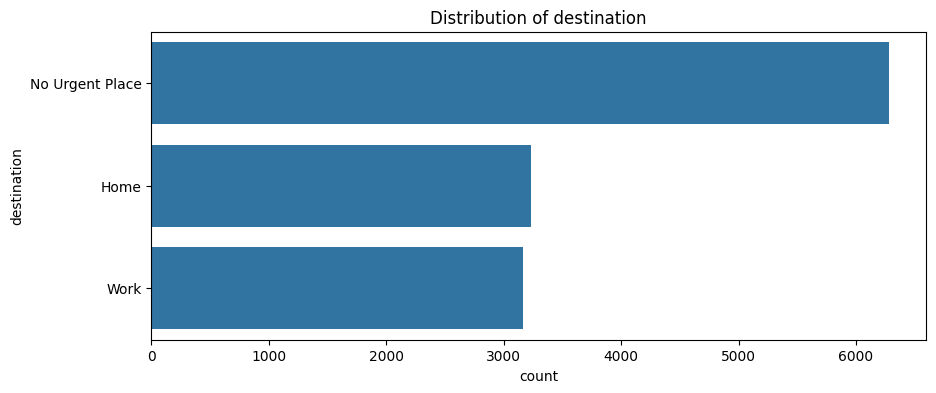

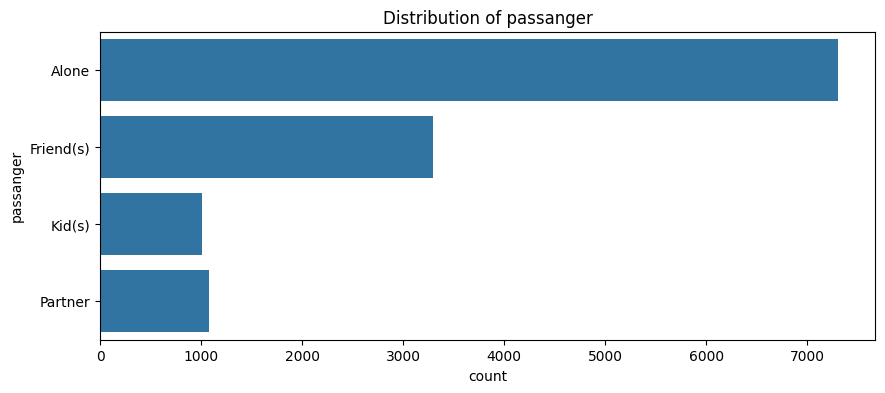

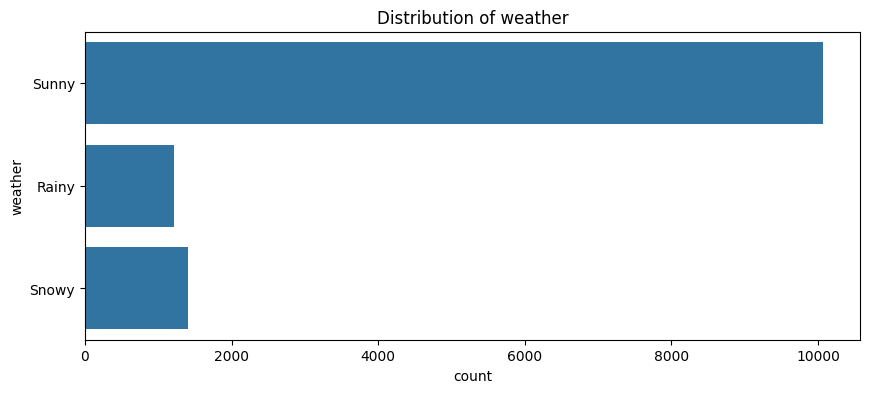

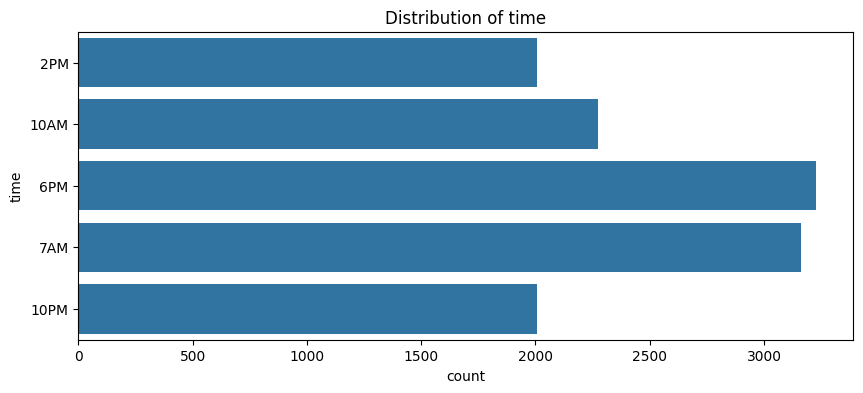

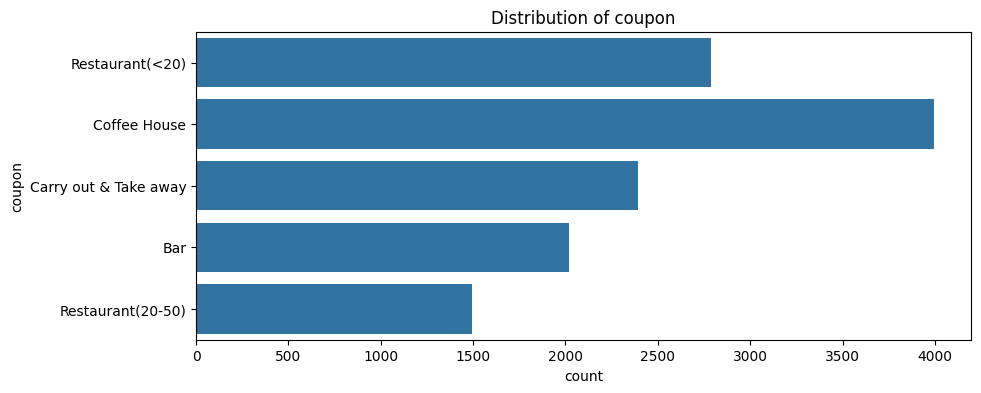

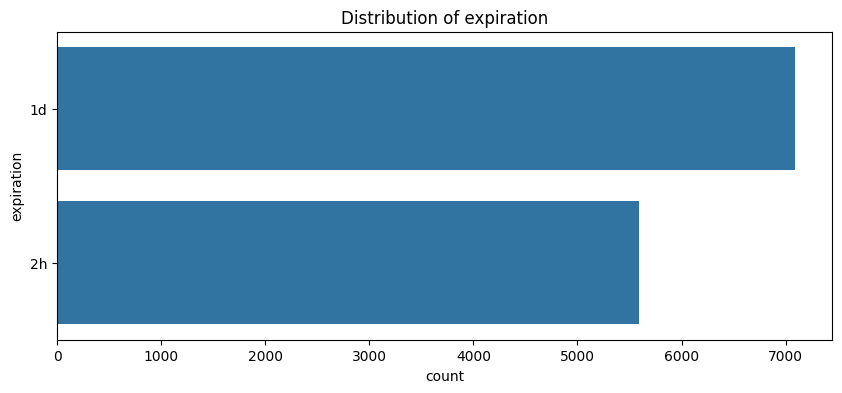

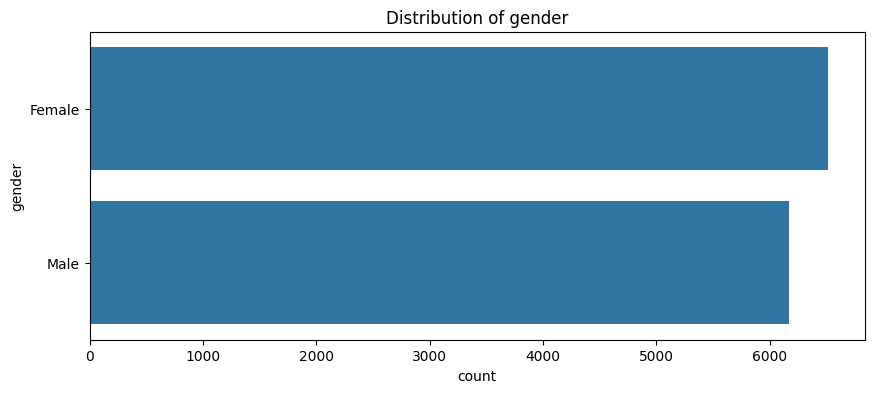

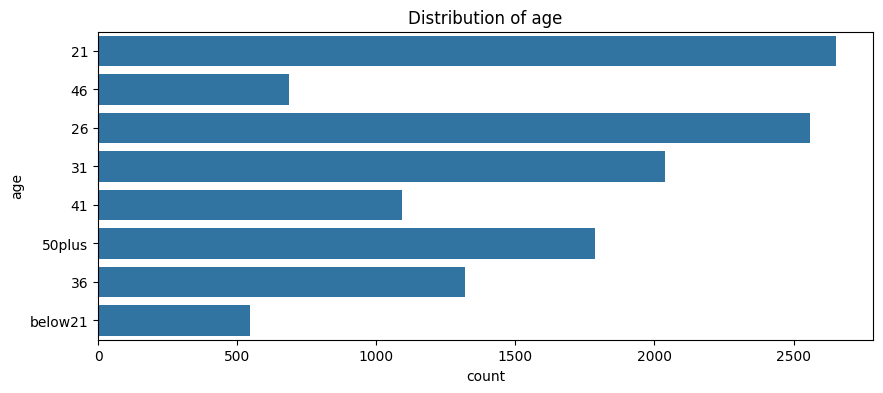

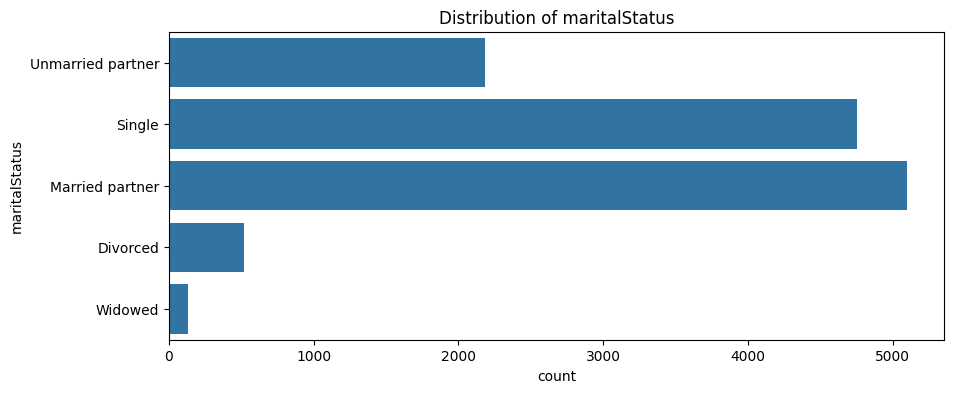

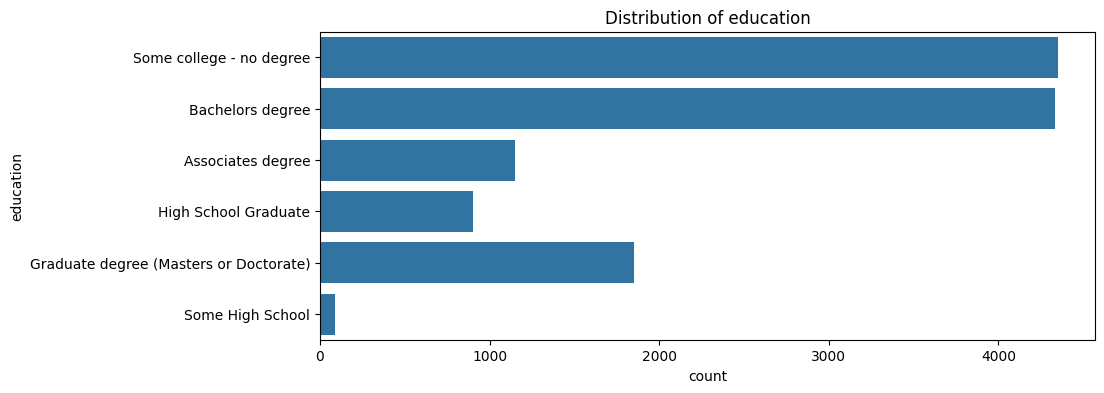

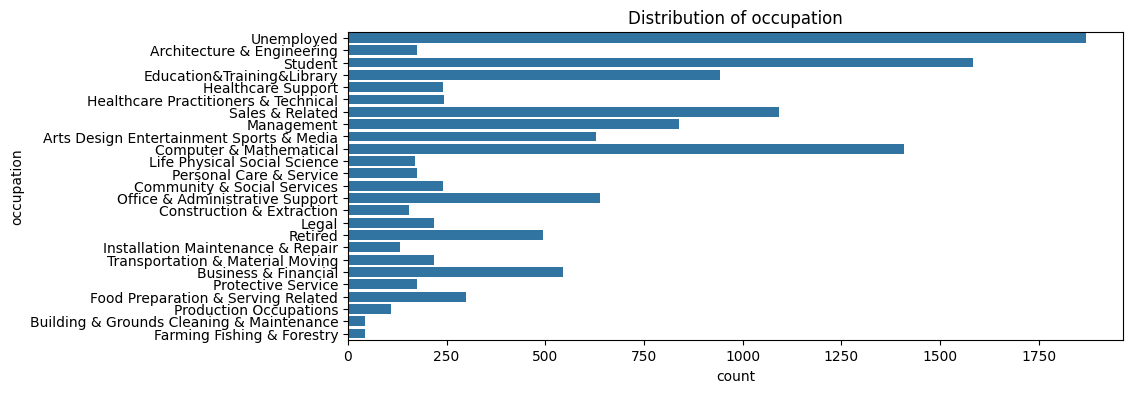

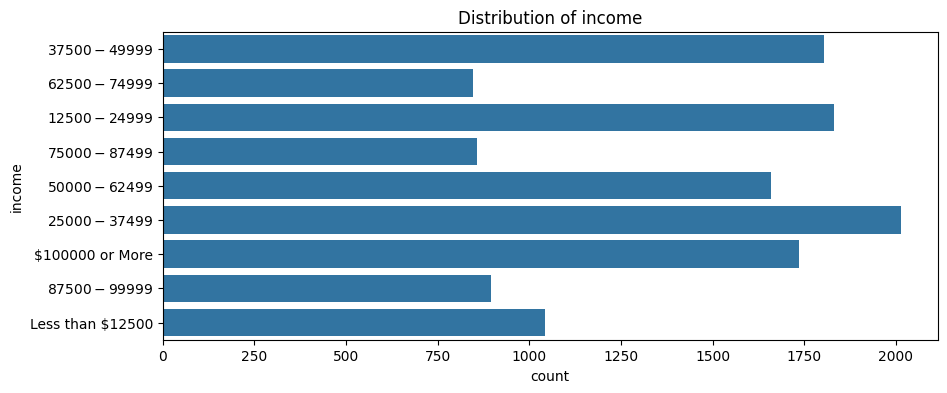

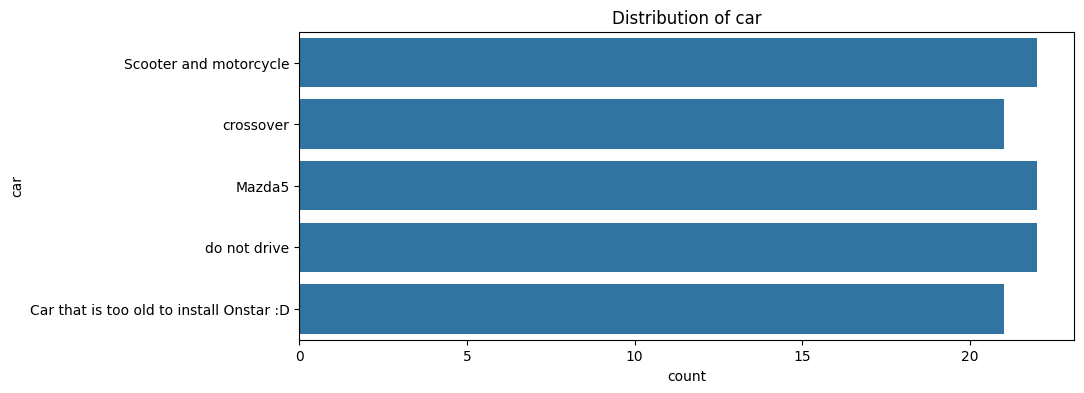

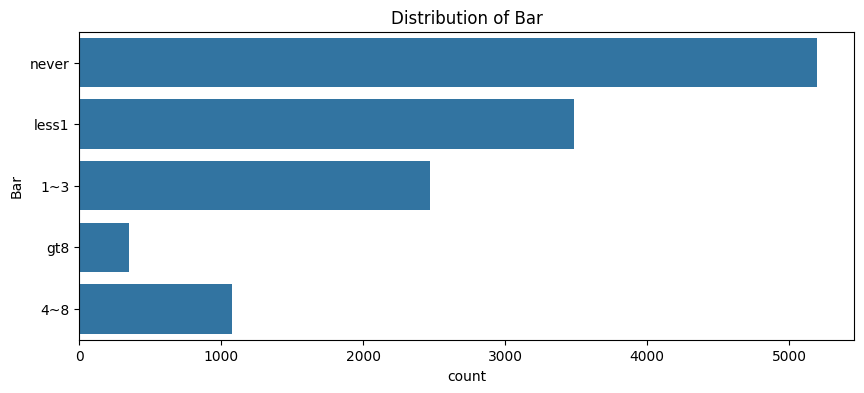

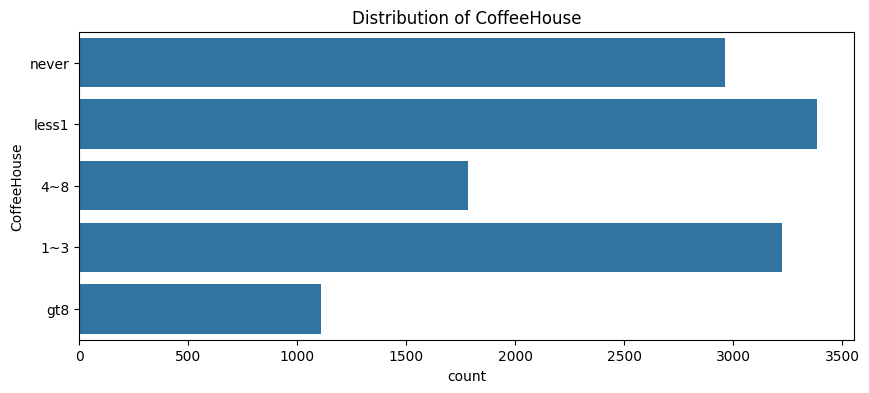

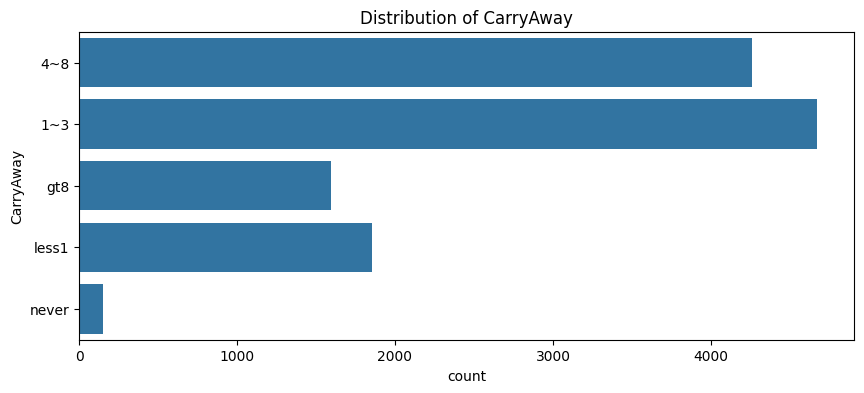

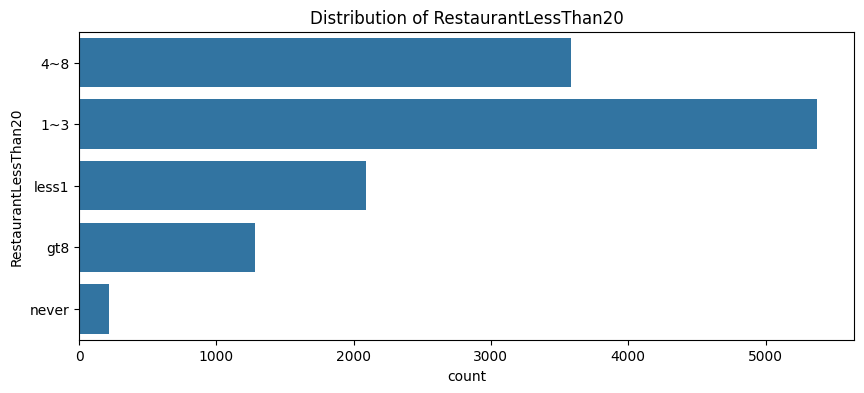

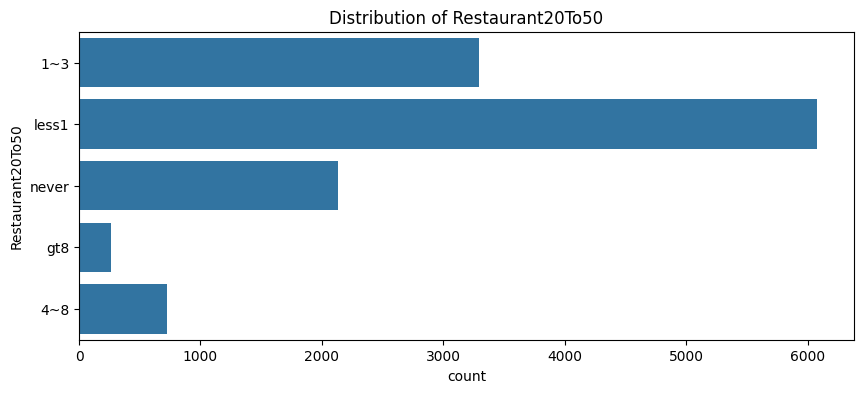

In [ ]:
#This code snippet came from Inyama (2023).
#We want to see the distribution of data in each of the columns that have categorical data
categorical_variables = in_vehicle_coupon_data.select_dtypes(include=['object']).columns
for var in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=var, data=in_vehicle_coupon_data)
    plt.title(f'Distribution of {var}')
    plt.show()

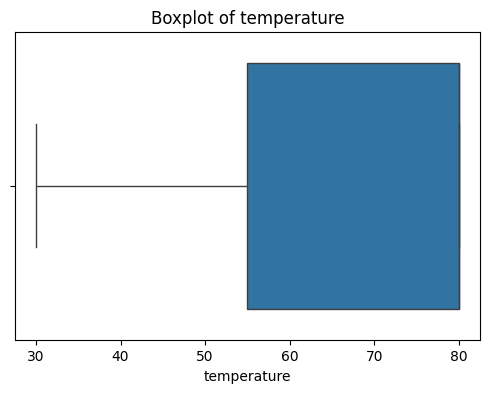

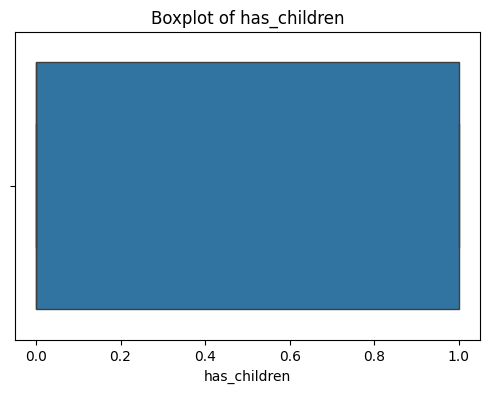

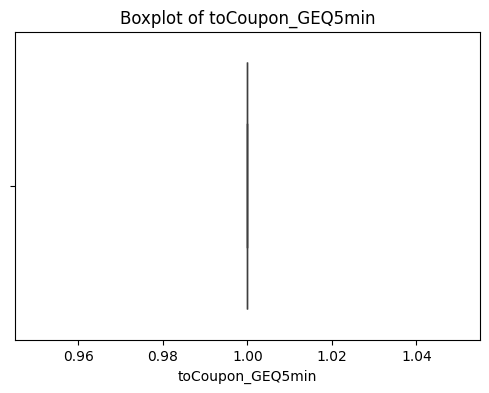

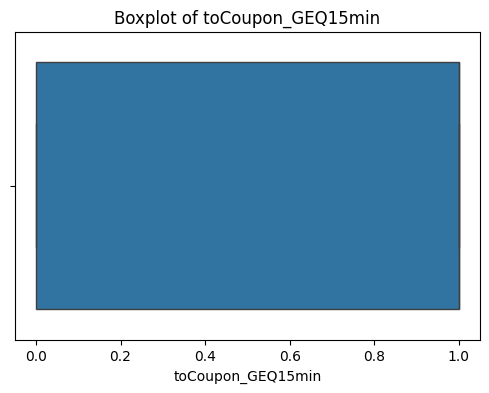

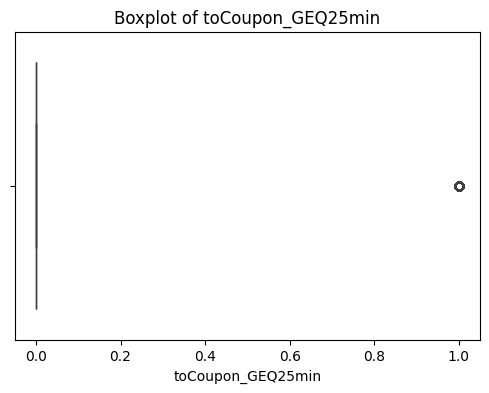

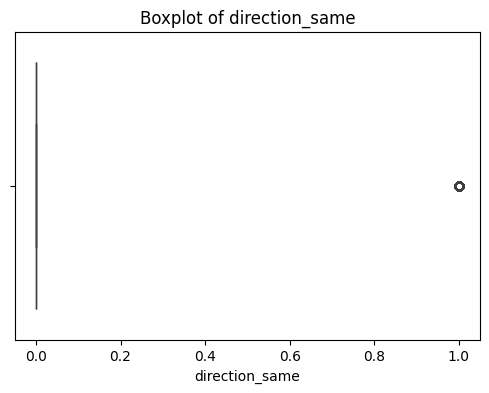

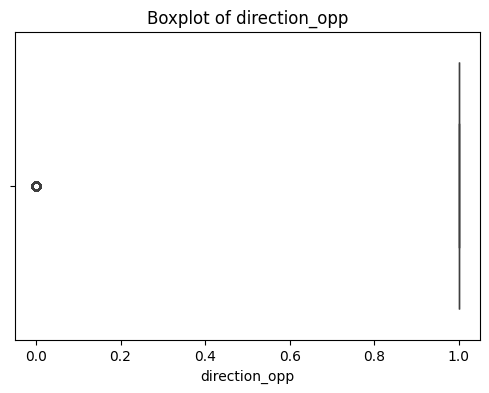

In [ ]:
#This code snippet came from Inyama (2023).
#We want to see the box plot for numerical data in numerical columns
numerical_columns = in_vehicle_coupon_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Y')
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=in_vehicle_coupon_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
#Drop column car as it has too many missing values
#Drop column toCoupon_GEQ5min because there is no variability in its value
#Drop column occupation because it has too many categories that leads to a lot of noise
in_vehicle_coupon_data = in_vehicle_coupon_data.drop(['car', 'occupation', 'toCoupon_GEQ5min'], axis=1)
in_vehicle_coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  income                12684 non-null  object
 13  Bar                   12577 non-null  object
 14  CoffeeHouse           12467 non-null  object
 15  CarryAway             12533 non-null

In [ ]:
# frequent value / mode imputation for missing values in data. This code snippet has been taken from Niralidedaniya (2022).
in_vehicle_coupon_data['Bar']=in_vehicle_coupon_data['Bar'].fillna(in_vehicle_coupon_data['Bar'].value_counts().index[0])
in_vehicle_coupon_data['CoffeeHouse']=in_vehicle_coupon_data['CoffeeHouse'].fillna(in_vehicle_coupon_data['CoffeeHouse'].value_counts().index[0])
in_vehicle_coupon_data['CarryAway']=in_vehicle_coupon_data['CarryAway'].fillna(in_vehicle_coupon_data['CarryAway'].value_counts().index[0])
in_vehicle_coupon_data['RestaurantLessThan20']=in_vehicle_coupon_data['RestaurantLessThan20'].fillna(in_vehicle_coupon_data['RestaurantLessThan20'].value_counts().index[0])
in_vehicle_coupon_data['Restaurant20To50']=in_vehicle_coupon_data['Restaurant20To50'].fillna(in_vehicle_coupon_data['Restaurant20To50'].value_counts().index[0])
#Lets check for missing values again
print('Is there any missing value present?',in_vehicle_coupon_data.isnull().values.any())


Is there any missing value present? False


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded_in_vehicle_coupon_data = encoder.fit_transform(in_vehicle_coupon_data)
encoded_in_vehicle_coupon_data = pd.DataFrame(encoded_in_vehicle_coupon_data, columns=in_vehicle_coupon_data.columns)
encoded_in_vehicle_coupon_data.cov() #covariance

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,0.504658,-0.078836,-0.035245,-0.015041,0.420743,-0.010986,-0.011497,0.002407,-0.003339,0.001797,...,-0.005564,-0.007850,-0.005959,0.002886,-0.000269,0.049593,0.045391,-0.024310,0.024310,-0.000671
passanger,-0.078836,0.887317,0.035703,0.040508,-0.543328,0.023840,0.034968,-0.009838,0.010415,-0.016771,...,0.022005,-0.012488,-0.017730,-0.033238,-0.042455,0.030170,-0.060297,-0.103995,0.103995,0.024082
weather,-0.035245,0.035703,0.401445,0.210926,-0.021266,0.125609,0.005569,-0.008552,-0.027806,-0.008874,...,0.010249,-0.005865,-0.026723,-0.003905,0.005444,-0.038262,-0.041579,0.004609,-0.004609,0.031006
temperature,-0.015041,0.040508,0.210926,0.587031,-0.065117,0.133050,0.047207,-0.009767,-0.046974,0.002288,...,0.010868,0.008828,-0.027345,-0.001147,0.002082,-0.059057,-0.053675,0.030548,-0.030548,0.023241
time,0.420743,-0.543328,-0.021266,-0.065117,2.072183,0.092426,-0.060532,-0.002523,-0.025719,0.005786,...,-0.009895,-0.011495,0.001266,-0.004725,0.019281,0.005156,0.136276,0.184128,-0.184128,-0.033780
coupon,-0.010986,0.023840,0.125609,0.133050,0.092426,1.818577,0.099355,0.004809,0.006944,-0.000149,...,-0.015862,-0.004406,-0.004440,0.016685,0.011179,-0.088045,-0.049269,-0.040432,0.040432,0.064804
expiration,-0.011497,0.034968,0.005569,0.047207,-0.060532,0.099355,0.246532,-0.000314,0.007207,-0.005098,...,-0.006669,-0.009675,-0.002079,-0.006039,-0.000336,0.010531,-0.005304,0.006848,-0.006848,-0.031952
gender,0.002407,-0.009838,-0.008552,-0.009767,-0.002523,0.004809,-0.000314,0.249842,-0.067526,0.023960,...,-0.120201,0.045669,-0.009576,0.025848,-0.000155,-0.001743,0.000444,-0.000923,0.000923,0.010886
age,-0.003339,0.010415,-0.027806,-0.046974,-0.025719,0.006944,0.007207,-0.067526,4.950184,-0.328927,...,0.712399,-0.002177,0.216170,-0.074016,-0.004063,0.029335,-0.000045,-0.007565,0.007565,-0.038836
maritalStatus,0.001797,-0.016771,-0.008874,0.002288,0.005786,-0.000149,-0.005098,0.023960,-0.328927,0.693751,...,-0.118302,0.014938,-0.022649,-0.001212,0.055322,-0.020447,0.001348,0.005645,-0.005645,0.010348


In [ ]:
# Since direction_same has same covariance values as direction_opp. It makes sense to just have one on them and reduce the noise.
in_vehicle_coupon_data = in_vehicle_coupon_data.drop(['direction_opp'], axis=1)
in_vehicle_coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  income                12684 non-null  object
 13  Bar                   12684 non-null  object
 14  CoffeeHouse           12684 non-null  object
 15  CarryAway             12684 non-null

In [ ]:
#Get the correlation matrix using ordinal encoding for the categorical values
encoder = OrdinalEncoder()
encoded_in_vehicle_coupon_data = encoder.fit_transform(in_vehicle_coupon_data)
encoded_in_vehicle_coupon_data = pd.DataFrame(encoded_in_vehicle_coupon_data, columns=in_vehicle_coupon_data.columns)
correlation_matrix = encoded_in_vehicle_coupon_data.corr()
print(correlation_matrix)

                      destination  passanger   weather  temperature      time  \
destination              1.000000  -0.117811 -0.078305    -0.027633  0.411437   
passanger               -0.117811   1.000000  0.059821     0.056127 -0.400690   
weather                 -0.078305   0.059821  1.000000     0.434497 -0.023316   
temperature             -0.027633   0.056127  0.434497     1.000000 -0.059041   
time                     0.411437  -0.400690 -0.023316    -0.059041  1.000000   
coupon                  -0.011468   0.018767  0.147008     0.128771  0.047612   
expiration              -0.032594   0.074764  0.017702     0.124090 -0.084691   
gender                   0.006779  -0.020896 -0.027003    -0.025504 -0.003507   
age                     -0.002112   0.004969 -0.019725    -0.027556 -0.008030   
maritalStatus            0.003036  -0.021376 -0.016816     0.003585  0.004826   
has_children            -0.006707   0.034542  0.012657    -0.019716 -0.007256   
education                0.0

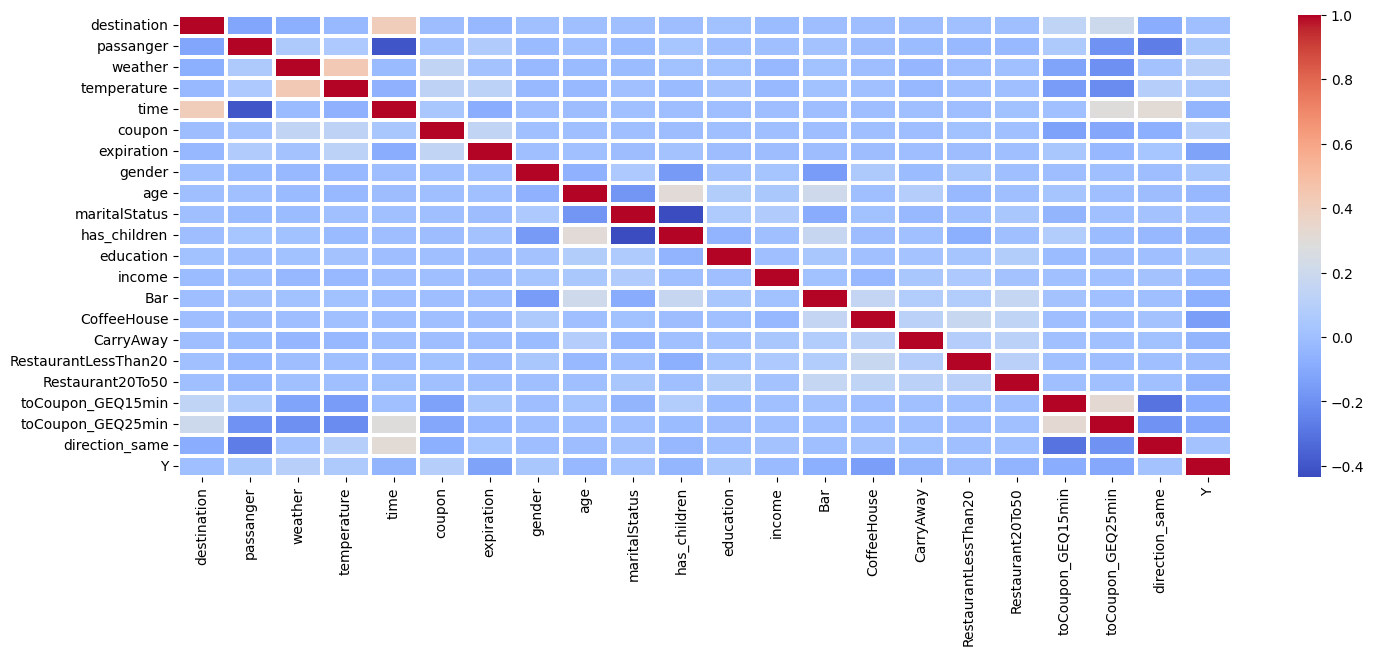

In [ ]:
#Heat map to visually quickly see high correlation
plt.figure(figsize=(17, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=1.5)
plt.show()

There seems to be a correlation between time and destination, between temperature and weather,
between marital status and has children, between passenger and time, between to coupon GEQ
15 min and same direction.

In [ ]:
#Stepwise Regression for Dimensionality reduction
import statsmodels.api as sm
x_stepwise = encoded_in_vehicle_coupon_data.drop("Y", axis=1)
y_stepwise = encoded_in_vehicle_coupon_data["Y"]
# Perform stepwise regression
result_stepwise_1 = sm.OLS(y_stepwise, x_stepwise).fit()
print(result_stepwise_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              856.7
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:49:27   Log-Likelihood:                         -8808.8
No. Observations:               12684   AIC:                                  1.766e+04
Df Residuals:                   12663   BIC:                                  1.782e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

**I choose alpha to be 0.05. Coefficients having a p-value of 0.05 or less will be statistically significant.**
Bar has 0.779 for p-value. Bar will be dropped.
It is the least statistically significant.  

In [ ]:
x_stepwise_2 = x_stepwise.drop("Bar", axis=1)
result_stepwise_2 = sm.OLS(y_stepwise, x_stepwise_2).fit()
print(result_stepwise_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              899.5
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:49:27   Log-Likelihood:                         -8808.9
No. Observations:               12684   AIC:                                  1.766e+04
Df Residuals:                   12664   BIC:                                  1.781e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In the second iteration, CarryAway is least statistically significant because it has highest p-value of 0.713 which is greater than alpha of 0.05. CarryAway should be dropped.

In [ ]:
x_stepwise_3 = x_stepwise_2.drop("CarryAway", axis=1)
result_stepwise_3 = sm.OLS(y_stepwise, x_stepwise_3).fit()
print(result_stepwise_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              946.9
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:49:27   Log-Likelihood:                         -8808.9
No. Observations:               12684   AIC:                                  1.766e+04
Df Residuals:                   12665   BIC:                                  1.780e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In the third iteration, Restaurant20To50 is least statistically significant because it has highest p-value of 0.576 which is greater than alpha of 0.05. Restaurant20To50 should be dropped.

In [ ]:
x_stepwise_4 = x_stepwise_3.drop("Restaurant20To50", axis=1)
result_stepwise_4 = sm.OLS(y_stepwise, x_stepwise_4).fit()
print(result_stepwise_4.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              999.6
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:49:28   Log-Likelihood:                         -8809.1
No. Observations:               12684   AIC:                                  1.765e+04
Df Residuals:                   12666   BIC:                                  1.779e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In the fourth iteration, income is least statistically significant because it has highest p-value of 0.405 which is greater than alpha of 0.05. income should be dropped.

In [ ]:
x_stepwise_5 = x_stepwise_4.drop("income", axis=1)
result_stepwise_5 = sm.OLS(y_stepwise, x_stepwise_5).fit()
print(result_stepwise_5.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              1058.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:49:28   Log-Likelihood:                         -8809.4
No. Observations:               12684   AIC:                                  1.765e+04
Df Residuals:                   12667   BIC:                                  1.778e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In the fifth iteration, age is least statistically significant because it has highest p-value of 0.166 which is greater than alpha of 0.05. age should be dropped.

In [ ]:
x_stepwise_6 = x_stepwise_5.drop("age", axis=1)
result_stepwise_6 = sm.OLS(y_stepwise, x_stepwise_6).fit()
print(result_stepwise_6.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              1124.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:49:28   Log-Likelihood:                         -8810.4
No. Observations:               12684   AIC:                                  1.765e+04
Df Residuals:                   12668   BIC:                                  1.777e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Therefore, age, income, Restaurant20To50, CarryAway and Bar need to be dropped from encoded_in_vehicle_coupon_data to create a dataset that is dimensionally reduced due to stepwise regression.

In [ ]:
stepwise_reduced_data = encoded_in_vehicle_coupon_data.drop(["Bar", "Restaurant20To50", "CarryAway", "income", "age"], axis=1)
stepwise_reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  float64
 1   passanger             12684 non-null  float64
 2   weather               12684 non-null  float64
 3   temperature           12684 non-null  float64
 4   time                  12684 non-null  float64
 5   coupon                12684 non-null  float64
 6   expiration            12684 non-null  float64
 7   gender                12684 non-null  float64
 8   maritalStatus         12684 non-null  float64
 9   has_children          12684 non-null  float64
 10  education             12684 non-null  float64
 11  CoffeeHouse           12684 non-null  float64
 12  RestaurantLessThan20  12684 non-null  float64
 13  toCoupon_GEQ15min     12684 non-null  float64
 14  toCoupon_GEQ25min     12684 non-null  float64
 15  direction_same     

In [ ]:
#Now I will do forward feature selection for dimensionality reduction of encoded_in_vehicle_coupon_data
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [ ]:
lreg = LinearRegression()
X_forward_feature_selection = encoded_in_vehicle_coupon_data.drop(['Y'], axis=1)
y_forward_feature_selection = encoded_in_vehicle_coupon_data['Y']
#I wasn to keep the same number of features as stepwise regression, so I picked 16
sfs1 = sfs(estimator=lreg, n_features_to_select=16, direction='forward', scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X_forward_feature_selection, y_forward_feature_selection)
selected_features_indices = sfs1.get_support(indices=True)
feature_names = X_forward_feature_selection.columns
# Get the names of the selected features
selected_features_forward = feature_names[selected_features_indices]
print("Selected feature names:", selected_features_forward)

Selected feature names: Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'has_children', 'education', 'income', 'CoffeeHouse',
       'CarryAway', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min'],
      dtype='object')


In [ ]:
#Below code snippet from https://stackoverflow.com/questions/72985935/how-to-run-machine-learning-algorithms-in-gpu
unselected_features_forward = list(set(feature_names) - set(selected_features_forward))
print("Unselected feature names by forward feature selection ", unselected_features_forward)

Unselected feature names by forward feature selection  ['maritalStatus', 'direction_same', 'temperature', 'Bar', 'RestaurantLessThan20']


In [ ]:
forward_feature_reduced_data = encoded_in_vehicle_coupon_data.drop(["Bar", "RestaurantLessThan20", "direction_same", "temperature", "maritalStatus"], axis=1)
forward_feature_reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   destination        12684 non-null  float64
 1   passanger          12684 non-null  float64
 2   weather            12684 non-null  float64
 3   time               12684 non-null  float64
 4   coupon             12684 non-null  float64
 5   expiration         12684 non-null  float64
 6   gender             12684 non-null  float64
 7   age                12684 non-null  float64
 8   has_children       12684 non-null  float64
 9   education          12684 non-null  float64
 10  income             12684 non-null  float64
 11  CoffeeHouse        12684 non-null  float64
 12  CarryAway          12684 non-null  float64
 13  Restaurant20To50   12684 non-null  float64
 14  toCoupon_GEQ15min  12684 non-null  float64
 15  toCoupon_GEQ25min  12684 non-null  float64
 16  Y                  126

Stepwise Regression and Forward Feature selection for dimensionality reduction gave different results resulting in different columns being dropped. Let's now see the results of Backward Feature elimination.

In [ ]:
X_backward_feature_elimination = encoded_in_vehicle_coupon_data.drop(['Y'], axis=1)
y_backward_feature_elimination = encoded_in_vehicle_coupon_data['Y']
#I wasn to keep the same number of features as stepwise regression and forward feature selection for comparison, so I picked 16
sfs2 = sfs(estimator=lreg, n_features_to_select=16, direction = 'backward', scoring='neg_mean_squared_error')
sfs2 = sfs2.fit(X_backward_feature_elimination, y_backward_feature_elimination)
selected_features_indices_2 = sfs2.get_support(indices=True)
feature_names_2 = X_backward_feature_elimination.columns
# Get the names of the selected features
selected_features_backward = feature_names_2[selected_features_indices_2]
print("Selected feature names for backward feature elimination:", selected_features_backward)

Selected feature names for backward feature elimination: Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'has_children', 'education', 'income', 'CoffeeHouse',
       'CarryAway', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min'],
      dtype='object')


In [ ]:
#Below code snippet from https://stackoverflow.com/questions/72985935/how-to-run-machine-learning-algorithms-in-gpu
unselected_features_backward = list(set(feature_names_2) - set(selected_features_backward))
print("Unselected feature names for backward feature elimination ", unselected_features_forward)

Unselected feature names for backward feature elimination  ['maritalStatus', 'direction_same', 'temperature', 'Bar', 'RestaurantLessThan20']


In [ ]:
backward_feature_reduced_data = encoded_in_vehicle_coupon_data.drop(["Bar", "RestaurantLessThan20", "direction_same", "temperature", "maritalStatus"], axis=1)
backward_feature_reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   destination        12684 non-null  float64
 1   passanger          12684 non-null  float64
 2   weather            12684 non-null  float64
 3   time               12684 non-null  float64
 4   coupon             12684 non-null  float64
 5   expiration         12684 non-null  float64
 6   gender             12684 non-null  float64
 7   age                12684 non-null  float64
 8   has_children       12684 non-null  float64
 9   education          12684 non-null  float64
 10  income             12684 non-null  float64
 11  CoffeeHouse        12684 non-null  float64
 12  CarryAway          12684 non-null  float64
 13  Restaurant20To50   12684 non-null  float64
 14  toCoupon_GEQ15min  12684 non-null  float64
 15  toCoupon_GEQ25min  12684 non-null  float64
 16  Y                  126

It is thus observed that the results of Forward feature selection and Backward feature elimination are the same and give the same reduced dataset.

I will now run the classification algorithms on the 2 dimensionally reduced datasets for comparison. The 2 data sets are: the one reduced using stepwise regression and the other reduced using backward feature elimination/forward feature selection.

Random forest on dataset reduced using stepwise regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
X_random_forest_stepwise_data = stepwise_reduced_data.drop('Y', axis=1)
y_random_forest_stepwise_data = stepwise_reduced_data['Y']
X_random_forest_stepwise_train, X_random_forest_stepwise_test, y_random_forest_stepwise_train, y_random_forest_stepwise_test = train_test_split(X_random_forest_stepwise_data, y_random_forest_stepwise_data, test_size=0.2, random_state=50)
rf_stepwise = RandomForestClassifier(n_estimators=100, random_state=50)
rf_stepwise.fit(X_random_forest_stepwise_train, y_random_forest_stepwise_train)
y_pred_stepwise = rf_stepwise.predict(X_random_forest_stepwise_test)
print("Accuracy:", accuracy_score(y_random_forest_stepwise_test, y_pred_stepwise))
print("Classification Report:\n", classification_report(y_random_forest_stepwise_test, y_pred_stepwise))
y_pred_prob_random_forest_stepwise = rf_stepwise.predict_proba(X_random_forest_stepwise_test)[:, 1] #make predictions
auc_random_forest_stepwise = roc_auc_score(y_random_forest_stepwise_test, y_pred_prob_random_forest_stepwise)
print("AUC:", auc_random_forest_stepwise)

Accuracy: 0.6862435947970044
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.61      0.63      1087
         1.0       0.72      0.74      0.73      1450

    accuracy                           0.69      2537
   macro avg       0.68      0.68      0.68      2537
weighted avg       0.68      0.69      0.69      2537

AUC: 0.7351197538305365


Random forest on dataset reduced using forward feature selection/backward feature elimination

In [ ]:
X_random_forest_backward_data = backward_feature_reduced_data.drop('Y', axis=1)
y_random_forest_backward_data = backward_feature_reduced_data['Y']
X_random_forest_backward_train, X_random_forest_backward_test, y_random_forest_backward_train, y_random_forest_backward_test = train_test_split(X_random_forest_backward_data, y_random_forest_backward_data, test_size=0.2, random_state=50)
rf_backward = RandomForestClassifier(n_estimators=100, random_state=50)
rf_backward.fit(X_random_forest_backward_train, y_random_forest_backward_train)
y_pred_backward = rf_backward.predict(X_random_forest_backward_test)
print("Accuracy:", accuracy_score(y_random_forest_backward_test, y_pred_backward))
print("Classification Report:\n", classification_report(y_random_forest_backward_test, y_pred_backward))
y_pred_prob_random_forest_backward = rf_backward.predict_proba(X_random_forest_backward_test)[:, 1] #make predictions
auc_random_forest_backward = roc_auc_score(y_random_forest_backward_test, y_pred_prob_random_forest_backward)
print("AUC:", auc_random_forest_backward)

Accuracy: 0.7335435553803705
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.65      0.68      1087
         1.0       0.75      0.79      0.77      1450

    accuracy                           0.73      2537
   macro avg       0.73      0.72      0.73      2537
weighted avg       0.73      0.73      0.73      2537

AUC: 0.7942876629762395


Logistic Regression on dataset reduced using stepwise regression

In [ ]:
from sklearn.linear_model import LogisticRegression
X_logistic_reg_stepwise_data = stepwise_reduced_data.drop('Y', axis=1)
y_logistic_reg_stepwise_data = stepwise_reduced_data['Y']
X_logistic_reg_stepwise_train, X_logistic_reg_stepwise_test, y_logistic_reg_stepwise_train, y_logistic_reg_stepwise_test = train_test_split(X_logistic_reg_stepwise_data, y_logistic_reg_stepwise_data, test_size=0.2, random_state=50)
logistic_stepwise_model = LogisticRegression()
logistic_stepwise_model.fit(X_logistic_reg_stepwise_train, y_logistic_reg_stepwise_train)
y_pred_logistic_reg_stepwise = logistic_stepwise_model.predict(X_logistic_reg_stepwise_test)
print("Accuracy:", accuracy_score(y_logistic_reg_stepwise_test, y_pred_logistic_reg_stepwise))
print("Classification Report:\n", classification_report(y_logistic_reg_stepwise_test, y_pred_logistic_reg_stepwise))
y_pred_prob_logistic_reg_stepwise = logistic_stepwise_model.predict_proba(X_logistic_reg_stepwise_test)[:, 1] #make predictions
auc_logistic_reg_stepwise = roc_auc_score(y_logistic_reg_stepwise_test, y_pred_prob_logistic_reg_stepwise)
print("AUC:", auc_logistic_reg_stepwise)

Accuracy: 0.6243594797004336
Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.42      0.49      1087
         1.0       0.64      0.77      0.70      1450

    accuracy                           0.62      2537
   macro avg       0.61      0.60      0.60      2537
weighted avg       0.62      0.62      0.61      2537

AUC: 0.66001966817879


Logistic Regression on dataset reduced using forward feature selection/backward feature elimination

In [ ]:
X_logistic_reg_backward_data = backward_feature_reduced_data.drop('Y', axis=1)
y_logistic_reg_backward_data = backward_feature_reduced_data['Y']
X_logistic_reg_backward_train, X_logistic_reg_backward_test, y_logistic_reg_backward_train, y_logistic_reg_backward_test = train_test_split(X_logistic_reg_backward_data, y_logistic_reg_backward_data, test_size=0.2, random_state=50)
logistic_backward_model = LogisticRegression()
logistic_backward_model.fit(X_logistic_reg_backward_train, y_logistic_reg_backward_train)
y_pred_logistic_reg_backward = logistic_backward_model.predict(X_logistic_reg_backward_test)
print("Accuracy:", accuracy_score(y_logistic_reg_backward_test, y_pred_logistic_reg_backward))
print("Classification Report:\n", classification_report(y_logistic_reg_backward_test, y_pred_logistic_reg_backward))
y_pred_prob_logistic_reg_backward = logistic_backward_model.predict_proba(X_logistic_reg_backward_test)[:, 1] #make predictions
auc_logistic_reg_backward = roc_auc_score(y_logistic_reg_backward_test, y_pred_prob_logistic_reg_backward)
print("AUC:", auc_logistic_reg_backward)

Accuracy: 0.6267244777296019
Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.42      0.49      1087
         1.0       0.64      0.78      0.70      1450

    accuracy                           0.63      2537
   macro avg       0.62      0.60      0.60      2537
weighted avg       0.62      0.63      0.61      2537

AUC: 0.6605948037940551


 k Nearest Neighbours (k-NN) on dataset reduced using stepwise regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_knn_stepwise_data = stepwise_reduced_data.drop('Y', axis=1)
y_knn_stepwise_data = stepwise_reduced_data['Y']
X_knn_stepwise_train, X_knn_stepwise_test, y_knn_stepwise_train, y_knn_stepwise_test = train_test_split(X_knn_stepwise_data, y_knn_stepwise_data, test_size=0.2, random_state=50)
k = 5 # Number of neighbors
knn_stepwise = KNeighborsClassifier(n_neighbors=k)
knn_stepwise.fit(X_knn_stepwise_train, y_knn_stepwise_train)
y_pred_knn_stepwise = knn_stepwise.predict(X_knn_stepwise_test)
print("Accuracy:", accuracy_score(y_knn_stepwise_test, y_pred_knn_stepwise))
print("Classification Report:\n", classification_report(y_knn_stepwise_test, y_pred_knn_stepwise))
y_pred_prob_knn_stepwise = knn_stepwise.predict_proba(X_knn_stepwise_test)[:, 1] #make predictions
auc_knn_stepwise = roc_auc_score(y_knn_stepwise_test, y_pred_prob_knn_stepwise)
print("AUC:", auc_knn_stepwise)

Accuracy: 0.6846669294442255
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.59      0.62      1087
         1.0       0.71      0.75      0.73      1450

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537

AUC: 0.7027078640992291


k Nearest Neighbours (k-NN) on dataset reduced using forward feature selection/backward feature elimination

In [ ]:
X_knn_backward_data = backward_feature_reduced_data.drop('Y', axis=1)
y_knn_backward_data = backward_feature_reduced_data['Y']
X_knn_backward_train, X_knn_backward_test, y_knn_backward_train, y_knn_backward_test = train_test_split(X_knn_backward_data, y_knn_backward_data, test_size=0.2, random_state=50)
k = 5 # Number of neighbors
knn_backward = KNeighborsClassifier(n_neighbors=k)
knn_backward.fit(X_knn_backward_train, y_knn_backward_train)
y_pred_knn_backward = knn_backward.predict(X_knn_backward_test)
print("Accuracy:", accuracy_score(y_knn_backward_test, y_pred_knn_backward))
print("Classification Report:\n", classification_report(y_knn_backward_test, y_pred_knn_backward))
y_pred_prob_knn_backward = knn_backward.predict_proba(X_knn_backward_test)[:, 1] #make predictions
auc_knn_backward = roc_auc_score(y_knn_backward_test, y_pred_prob_knn_backward)
print("AUC:", auc_knn_backward)

Accuracy: 0.6460386283011431
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.54      0.57      1087
         1.0       0.68      0.73      0.70      1450

    accuracy                           0.65      2537
   macro avg       0.64      0.63      0.63      2537
weighted avg       0.64      0.65      0.64      2537

AUC: 0.6774247374932589


Naïve Bayes on dataset reduced using stepwise regression. I will use Gaussian Naïve Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_nb_stepwise_data = stepwise_reduced_data.drop('Y', axis=1)
y_nb_stepwise_data = stepwise_reduced_data['Y']
X_nb_stepwise_train, X_nb_stepwise_test, y_nb_stepwise_train, y_nb_stepwise_test = train_test_split(X_nb_stepwise_data, y_nb_stepwise_data, test_size=0.2, random_state=50)
nb_stepwise_model = GaussianNB()
nb_stepwise_model.fit(X_nb_stepwise_train, y_nb_stepwise_train)
y_pred_nb_stepwise = nb_stepwise_model.predict(X_nb_stepwise_test)
print("Accuracy:", accuracy_score(y_nb_stepwise_test, y_pred_nb_stepwise))
print("Classification Report:\n", classification_report(y_nb_stepwise_test, y_pred_nb_stepwise))
y_pred_prob_nb_stepwise = nb_stepwise_model.predict_proba(X_nb_stepwise_test)[:, 1] #make predictions
auc_nb_stepwise = roc_auc_score(y_nb_stepwise_test, y_pred_prob_nb_stepwise)
print("AUC:", auc_nb_stepwise)

Accuracy: 0.5880961765865195
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.34      0.41      1087
         1.0       0.61      0.78      0.68      1450

    accuracy                           0.59      2537
   macro avg       0.57      0.56      0.55      2537
weighted avg       0.58      0.59      0.57      2537

AUC: 0.6340354661675602


Naïve Bayes on dataset reduced using forward feature selection/backward feature elimination

In [ ]:
X_nb_backward_data = backward_feature_reduced_data.drop('Y', axis=1)
y_nb_backward_data = backward_feature_reduced_data['Y']
X_nb_backward_train, X_nb_backward_test, y_nb_backward_train, y_nb_backward_test = train_test_split(X_nb_backward_data, y_nb_backward_data, test_size=0.2, random_state=50)
nb_backward_model = GaussianNB()
nb_backward_model.fit(X_nb_backward_train, y_nb_backward_train)
y_pred_nb_backward = nb_backward_model.predict(X_nb_backward_test)
print("Accuracy:", accuracy_score(y_nb_backward_test, y_pred_nb_backward))
print("Classification Report:\n", classification_report(y_nb_backward_test, y_pred_nb_backward))
y_pred_prob_nb_backward = nb_backward_model.predict_proba(X_nb_backward_test)[:, 1] #make predictions
auc_nb_backward = roc_auc_score(y_nb_backward_test, y_pred_prob_nb_backward)
print("AUC:", auc_nb_backward)

Accuracy: 0.5904611746156878
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.34      0.42      1087
         1.0       0.61      0.78      0.68      1450

    accuracy                           0.59      2537
   macro avg       0.57      0.56      0.55      2537
weighted avg       0.58      0.59      0.57      2537

AUC: 0.6393208133743615


Decision Tree on dataset reduced using stepwise regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_decision_tree_stepwise_data = stepwise_reduced_data.drop('Y', axis=1)
y_decision_tree_stepwise_data = stepwise_reduced_data['Y']
X_dt_stepwise_train, X_dt_stepwise_test, y_dt_stepwise_train, y_dt_stepwise_test = train_test_split(X_decision_tree_stepwise_data, y_decision_tree_stepwise_data, test_size=0.2, random_state=50)
dt_stepwise_model = DecisionTreeClassifier()
dt_stepwise_model.fit(X_dt_stepwise_train, y_dt_stepwise_train)
y_pred_dt_stepwise = dt_stepwise_model.predict(X_dt_stepwise_test)
print("Accuracy:", accuracy_score(y_dt_stepwise_test, y_pred_dt_stepwise))
print("Classification Report:\n", classification_report(y_dt_stepwise_test, y_pred_dt_stepwise))
y_pred_prob_dt_stepwise = dt_stepwise_model.predict_proba(X_dt_stepwise_test)[:, 1] #make predictions
auc_dt_stepwise = roc_auc_score(y_dt_stepwise_test, y_pred_prob_dt_stepwise)
print("AUC:", auc_dt_stepwise)

Accuracy: 0.6590461174615688
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.63      0.61      1087
         1.0       0.71      0.68      0.70      1450

    accuracy                           0.66      2537
   macro avg       0.65      0.66      0.65      2537
weighted avg       0.66      0.66      0.66      2537

AUC: 0.659372521650858


Decision Tree on dataset reduced using forward feature selection/backward feature elimination

In [ ]:
X_decision_tree_backward_data = backward_feature_reduced_data.drop('Y', axis=1)
y_decision_tree_backward_data = backward_feature_reduced_data['Y']
X_dt_backward_train, X_dt_backward_test, y_dt_backward_train, y_dt_backward_test = train_test_split(X_decision_tree_backward_data, y_decision_tree_backward_data, test_size=0.2, random_state=50)
dt_backward_model = DecisionTreeClassifier()
dt_backward_model.fit(X_dt_backward_train, y_dt_backward_train)
y_pred_dt_backward = dt_backward_model.predict(X_dt_backward_test)
print("Accuracy:", accuracy_score(y_dt_backward_test, y_pred_dt_backward))
print("Classification Report:\n", classification_report(y_dt_backward_test, y_pred_dt_backward))
y_pred_prob_dt_backward = dt_backward_model.predict_proba(X_dt_backward_test)[:, 1] #make predictions
auc_dt_backward = roc_auc_score(y_dt_backward_test, y_pred_prob_dt_backward)
print("AUC:", auc_dt_backward)

Accuracy: 0.6637761135199054
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.64      0.62      1087
         1.0       0.72      0.68      0.70      1450

    accuracy                           0.66      2537
   macro avg       0.66      0.66      0.66      2537
weighted avg       0.67      0.66      0.66      2537

AUC: 0.6611940487897725


Random forest on dataset reduced using forward feature selection/backward feature elimination had the highest accuracy and AUC value closest to 1.